#### Eigenfaces for feature extraction

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import mglearn as mglearn
%matplotlib inline

from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

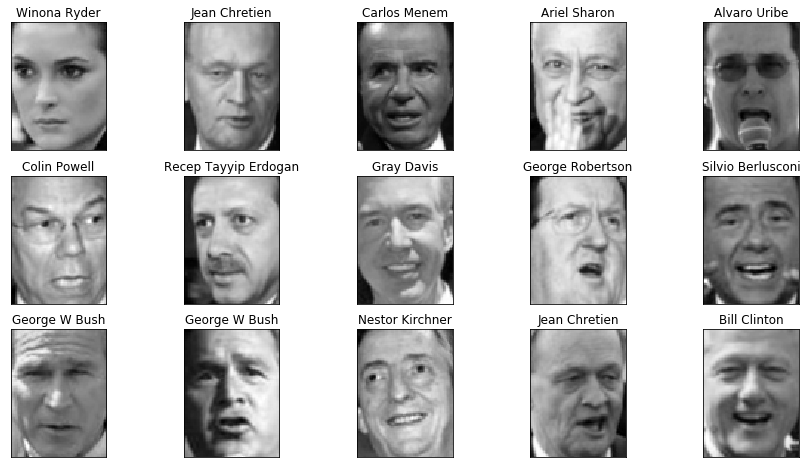

In [2]:
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(3, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image, cmap="gray")
    ax.set_title(people.target_names[target])

In [3]:
people.data[:5]

array([[ 57.      ,  60.333332,  78.      , ...,  17.333334,  16.666666,
         22.666666],
       [ 66.666664,  80.666664,  88.666664, ...,   8.666667,   8.333333,
          9.333333],
       [ 18.666666,  14.333333,  15.      , ...,  22.666666,  22.666666,
         25.666666],
       [ 76.666664, 113.666664, 172.      , ..., 140.66667 , 143.      ,
        143.33333 ],
       [ 79.      ,  70.      ,  70.333336, ...,  80.333336,  74.      ,
         64.333336]], dtype=float32)

In [4]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

X_people = X_people / 255

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

pca = PCA(n_components=100, random_state=0) #whiten=True,
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)

scaler = StandardScaler()
scaler.fit(X_train_pca)
X_train_pca = scaler.transform(X_train_pca) 
X_test_pca = scaler.transform(X_test_pca)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print(knn.score(X_test_pca, y_test))

(1547, 100)
0.312015503875969


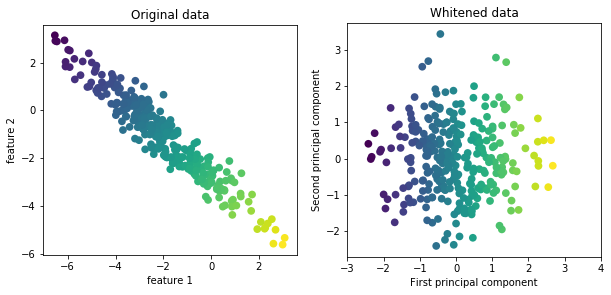

In [6]:
mglearn.plots.plot_pca_whitening()

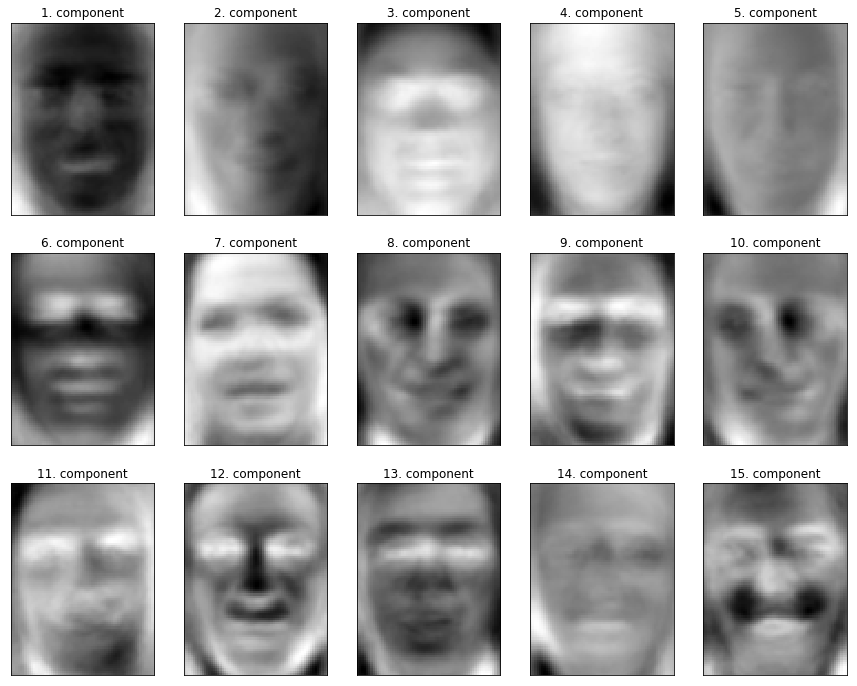

In [7]:
fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape),
              cmap='gray')
    ax.set_title("{}. component".format((i + 1)))

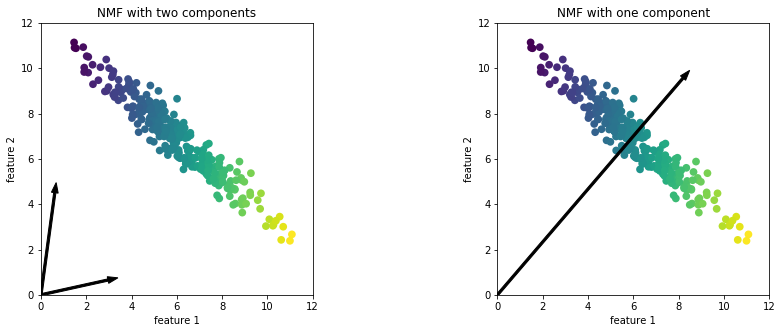

In [8]:
mglearn.plots.plot_nmf_illustration()

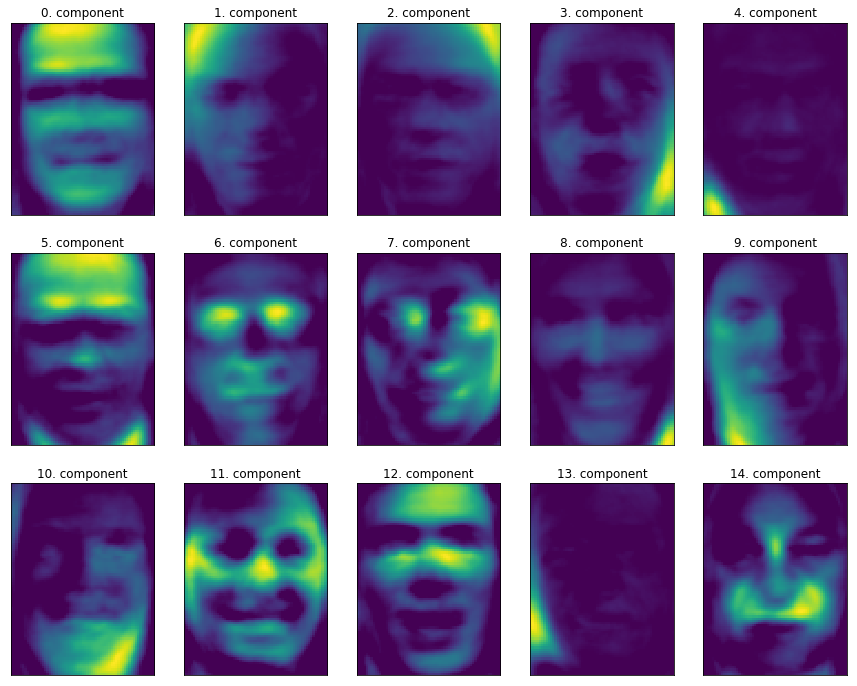

In [9]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}. component".format(i))

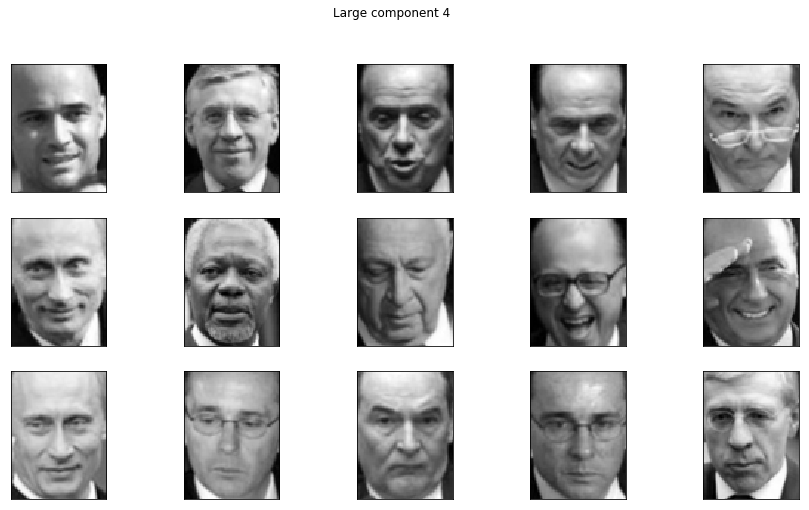

In [10]:
compn = 5
# sort by 4rd component, plot first 10 images
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(3, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Large component 4")
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape), cmap='gray')